In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [2]:
# !pip install datasets --upgrade
import datasets
import transformers
import torch
datasets.__version__, transformers.__version__, torch.__version__

('3.4.1', '4.48.3', '2.6.0+cu124')

In [3]:
import torch.nn as nn
import torch
from tqdm.auto import tqdm
import random, math, time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

#make our work comparable if restarted the kernel
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

cuda


In [4]:
from datasets import load_dataset

# Load the HateXplain dataset from Hugging Face
dataset = load_dataset("hate_speech_offensive")

# # Check dataset structure
# print(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.63M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24783 [00:00<?, ? examples/s]

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['count', 'hate_speech_count', 'offensive_language_count', 'neither_count', 'class', 'tweet'],
        num_rows: 24783
    })
})


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.63M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24783 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/24783 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training Odd-Layer Student...


Epoch 1: 100%|██████████| 313/313 [02:32<00:00,  2.06it/s]


Epoch 1: Loss=0.3421, Eval Accuracy=0.9110


Epoch 2: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 2: Loss=0.3145, Eval Accuracy=0.9260


Epoch 3: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 3: Loss=0.3052, Eval Accuracy=0.9390


Epoch 4: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 4: Loss=0.2983, Eval Accuracy=0.9510


Epoch 5: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 5: Loss=0.2931, Eval Accuracy=0.9610

Training Even-Layer Student...


Epoch 1: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 1: Loss=0.3471, Eval Accuracy=0.9020


Epoch 2: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 2: Loss=0.3159, Eval Accuracy=0.9260


Epoch 3: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 3: Loss=0.3067, Eval Accuracy=0.9370


Epoch 4: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 4: Loss=0.2996, Eval Accuracy=0.9560


Epoch 5: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]


Epoch 5: Loss=0.2940, Eval Accuracy=0.9680

Training LoRA Student...


Epoch 1: 100%|██████████| 313/313 [01:06<00:00,  4.74it/s]


Epoch 1: Loss=0.7002, Eval Accuracy=0.7870


Epoch 2: 100%|██████████| 313/313 [01:06<00:00,  4.74it/s]


Epoch 2: Loss=0.6525, Eval Accuracy=0.7870


Epoch 3: 100%|██████████| 313/313 [01:05<00:00,  4.74it/s]


Epoch 3: Loss=0.6147, Eval Accuracy=0.7870


Epoch 4: 100%|██████████| 313/313 [01:05<00:00,  4.75it/s]


Epoch 4: Loss=0.5534, Eval Accuracy=0.7870


Epoch 5: 100%|██████████| 313/313 [01:06<00:00,  4.73it/s]


Epoch 5: Loss=0.5243, Eval Accuracy=0.7890

Test Set Evaluation:
Odd-Layer Test Accuracy: 0.9660
Even-Layer Test Accuracy: 0.9630
LoRA Test Accuracy: 0.7730


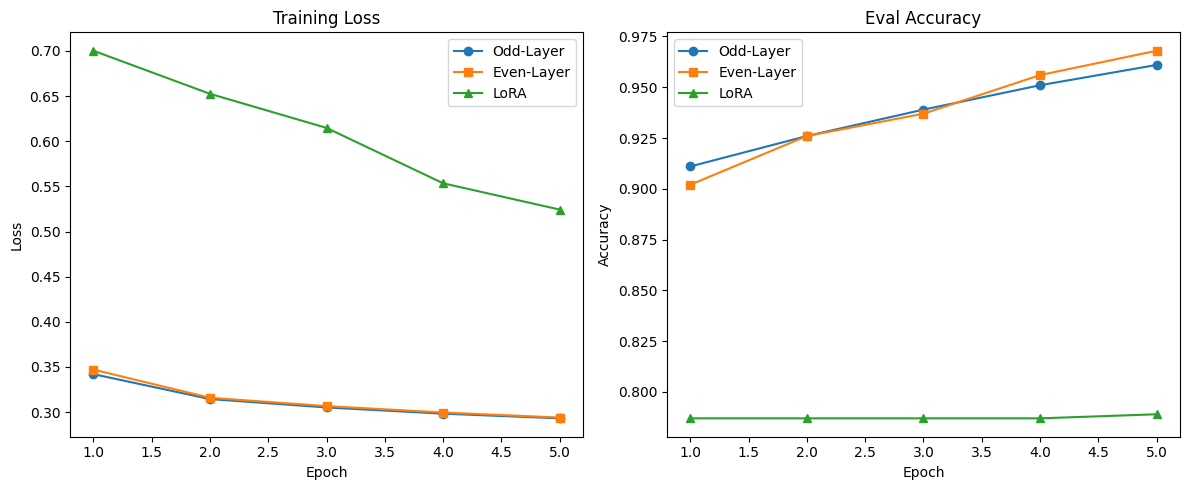

Models saved as .pth files: student_odd.pth, student_even.pth, student_lora.pth


('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json')

In [3]:
import torch
from torch import nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
import numpy as np
from datasets import load_dataset
from transformers import BertTokenizer, BertConfig, BertForSequenceClassification, get_linear_schedule_with_warmup
from peft import LoraConfig, get_peft_model
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1234)

# --- Task 1: Load and Preprocess Dataset ---

def load_and_prepare_data():
    dataset = load_dataset("hate_speech_offensive")
    labels = ["Non-Hate", "Offensive", "Hate"]
    dataset_to_our_map = {0: 2, 1: 1, 2: 0}  # Hate→2, Offensive→1, Non-Hate→0

    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

    def preprocess(batch):
        encodings = tokenizer(batch["tweet"], max_length=128, truncation=True, padding="max_length")
        encodings["labels"] = [dataset_to_our_map[cls] for cls in batch["class"]]
        return encodings

    processed = dataset.map(preprocess, batched=True)
    processed = processed.remove_columns(["count", "hate_speech_count", "offensive_language_count", "neither_count", "tweet", "class"])
    processed.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

    train_data = processed["train"].shuffle(seed=42).select(range(10000))
    eval_data = processed["train"].shuffle(seed=42).select(range(1000, 2000))
    test_data = processed["train"].shuffle(seed=42).select(range(2000, 3000))

    return train_data, eval_data, test_data, tokenizer, labels

train_data, eval_data, test_data, tokenizer, labels = load_and_prepare_data()

# DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
eval_loader = DataLoader(eval_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# --- Task 2 & 3: Model Setup ---

teacher = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=3, id2label={i: lbl for i, lbl in enumerate(labels)}
).to(device)

config_6 = BertConfig.from_pretrained("bert-base-uncased", num_hidden_layers=6, num_labels=3)

def distill_layers(teacher, student, layer_type):
    student_state = student.state_dict()
    teacher_layers = teacher.bert.encoder.layer
    student_layers = student.bert.encoder.layer
    layer_map = {"odd": [0, 2, 4, 6, 8, 10], "even": [1, 3, 5, 7, 9, 11]}[layer_type]

    for i, layer_idx in enumerate(layer_map):
        student_layers[i].load_state_dict(teacher_layers[layer_idx].state_dict())

    student.load_state_dict(student_state, strict=False)
    return student

student_odd = BertForSequenceClassification(config_6).to(device)
student_even = BertForSequenceClassification(config_6).to(device)
student_odd = distill_layers(teacher, student_odd, "odd")
student_even = distill_layers(teacher, student_even, "even")

student_lora = BertForSequenceClassification(config_6).to(device)
lora_config = LoraConfig(
    task_type="SEQ_CLS", r=8, lora_alpha=16, lora_dropout=0.1, target_modules=["query", "value"]
)
student_lora = get_peft_model(student_lora, lora_config)

# --- Training Functions ---

def distillation_loss(student_logits, teacher_logits, labels, temp=2.0):
    cls_loss = nn.CrossEntropyLoss()(student_logits, labels)
    kl_loss = nn.KLDivLoss(reduction="batchmean")(
        nn.functional.log_softmax(student_logits / temp, dim=-1),
        nn.functional.softmax(teacher_logits / temp, dim=-1)
    ) * (temp ** 2)
    cos_loss = nn.CosineEmbeddingLoss()(
        student_logits, teacher_logits, torch.ones(student_logits.size(0)).to(device)
    )
    return (cls_loss + kl_loss + cos_loss) / 3

def train_model(model, loader, epochs=5, is_distillation=True, optimizer=None, scheduler=None):
    model.train()
    teacher.eval() if is_distillation else None
    losses, accuracies = [], []

    for epoch in range(epochs):
        epoch_loss = 0
        for batch in tqdm(loader, desc=f"Epoch {epoch+1}"):
            batch = {k: v.to(device) for k, v in batch.items()}
            student_outputs = model(**batch)

            if is_distillation:
                with torch.no_grad():
                    teacher_outputs = teacher(**batch)
                loss = distillation_loss(student_outputs.logits, teacher_outputs.logits, batch["labels"])
            else:
                loss = nn.CrossEntropyLoss()(student_outputs.logits, batch["labels"])

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)

        model.eval()
        preds, true = [], []
        with torch.no_grad():
            for batch in eval_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                preds.extend(outputs.logits.argmax(-1).cpu().numpy())
                true.extend(batch["labels"].cpu().numpy())
        acc = accuracy_score(true, preds)
        accuracies.append(acc)
        print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Eval Accuracy={acc:.4f}")
        model.train()

    return losses, accuracies

# Train Models
opt_odd = AdamW(student_odd.parameters(), lr=5e-5)
sch_odd = get_linear_schedule_with_warmup(opt_odd, num_warmup_steps=0, num_training_steps=5*len(train_loader))
print("Training Odd-Layer Student...")
odd_losses, odd_accs = train_model(student_odd, train_loader, optimizer=opt_odd, scheduler=sch_odd)

opt_even = AdamW(student_even.parameters(), lr=5e-5)
sch_even = get_linear_schedule_with_warmup(opt_even, num_warmup_steps=0, num_training_steps=5*len(train_loader))
print("\nTraining Even-Layer Student...")
even_losses, even_accs = train_model(student_even, train_loader, optimizer=opt_even, scheduler=sch_even)

opt_lora = AdamW(student_lora.parameters(), lr=5e-5)
sch_lora = get_linear_schedule_with_warmup(opt_lora, num_warmup_steps=0, num_training_steps=5*len(train_loader))
print("\nTraining LoRA Student...")
lora_losses, lora_accs = train_model(student_lora, train_loader, is_distillation=False, optimizer=opt_lora, scheduler=sch_lora)

# --- Task 4: Evaluation and Analysis ---

def evaluate_on_test(model, loader):
    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds.extend(outputs.logits.argmax(-1).cpu().numpy())
            true.extend(batch["labels"].cpu().numpy())
    return accuracy_score(true, preds)

print("\nTest Set Evaluation:")
odd_test_acc = evaluate_on_test(student_odd, test_loader)
even_test_acc = evaluate_on_test(student_even, test_loader)
lora_test_acc = evaluate_on_test(student_lora, test_loader)
print(f"Odd-Layer Test Accuracy: {odd_test_acc:.4f}")
print(f"Even-Layer Test Accuracy: {even_test_acc:.4f}")
print(f"LoRA Test Accuracy: {lora_test_acc:.4f}")

# Plotting
epochs = range(1, 6)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, odd_losses, label="Odd-Layer", marker="o")
plt.plot(epochs, even_losses, label="Even-Layer", marker="s")
plt.plot(epochs, lora_losses, label="LoRA", marker="^")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, odd_accs, label="Odd-Layer", marker="o")
plt.plot(epochs, even_accs, label="Even-Layer", marker="s")
plt.plot(epochs, lora_accs, label="LoRA", marker="^")
plt.title("Eval Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# Save Models in .pth Format
torch.save(student_odd.state_dict(), "student_odd.pth")
torch.save(student_even.state_dict(), "student_even.pth")
torch.save(student_lora.state_dict(), "student_lora.pth")
print("Models saved as .pth files: student_odd.pth, student_even.pth, student_lora.pth")

# Save Tokenizer (still needed for inference)
tokenizer.save_pretrained("tokenizer")